In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
from seaborn import set_style

set_style("whitegrid")

#Import csv files
data1=pd.read_csv('../data/SPY_prices.csv', parse_dates=['time'])
data2=pd.read_csv('../data/SPY_MACD.csv', parse_dates=['time'])
data1[['open','volume']].to_numpy()
data2[['MACD','MACD_Hist','MACD_Signal']].to_numpy()
type(data1.open[0])

numpy.float64

In [5]:
data1

,time,open,high,low,close,volume
0,2023-06-05 19:59:00,426.60,426.64,426.6000,426.6400,1342
1,2023-06-05 19:58:00,426.56,426.56,426.5600,426.5600,152
2,2023-06-05 19:56:00,426.58,426.58,426.5785,426.5785,1135
3,2023-06-05 19:55:00,426.54,426.54,426.5400,426.5400,701
4,2023-06-05 19:54:00,426.55,426.55,426.5500,426.5500,670
...,...,...,...,...,...,...
21180,2023-04-28 04:04:00,411.10,411.10,411.1000,411.1000,300
21181,2023-04-28 04:03:00,411.08,411.19,411.0200,411.1900,1260
21182,2023-04-28 04:02:00,411.01,411.01,411.0000,411.0000,1603
21183,2023-04-28 04:01:00,411.16,411.16,411.0500,411.0700,2546


In [9]:
#Select 'time', 'open', and 'volume' data between 9:30 am and 4:00 pm
L=[]
period=data1.time.to_list()[0]-data1.time.to_list()[-1]
for i in range(period.days+1):
    td = pd.Timedelta(i, "d")
    L.append(data1.loc[(data1.time>=pd.Timestamp(2023,data1.time[0].month,data1.time[0].day,9,30)-td) &
                       (data1.time<pd.Timestamp(2023,data1.time[0].month,data1.time[0].day,16)-td),['time','open','volume']])
df1=pd.concat(L)
df1=df1.reset_index(drop=True)
df1

,time,open,volume
0,2023-06-05 15:59:00,427.1200,1919058
1,2023-06-05 15:58:00,427.2600,769751
2,2023-06-05 15:57:00,427.2593,738925
3,2023-06-05 15:56:00,427.2550,599060
4,2023-06-05 15:55:00,427.2600,548597
...,...,...,...
10131,2023-04-28 09:34:00,411.9800,222984
10132,2023-04-28 09:33:00,412.1400,188445
10133,2023-04-28 09:32:00,411.9500,282485
10134,2023-04-28 09:31:00,411.9000,306992


In [10]:
data2

,time,MACD,MACD_Hist,MACD_Signal
0,2023-06-05 19:59:00,-0.0491,0.0085,-0.0576
1,2023-06-05 19:58:00,-0.0558,0.0040,-0.0598
2,2023-06-05 19:56:00,-0.0594,0.0013,-0.0608
3,2023-06-05 19:55:00,-0.0652,-0.0042,-0.0611
4,2023-06-05 19:54:00,-0.0676,-0.0076,-0.0600
...,...,...,...,...
21147,2023-04-28 04:51:00,-0.1141,0.0064,-0.1205
21148,2023-04-28 04:49:00,-0.1194,0.0027,-0.1221
21149,2023-04-28 04:48:00,-0.1284,-0.0057,-0.1228
21150,2023-04-28 04:47:00,-0.1239,-0.0025,-0.1214


In [11]:
#Select 'time', 'MACD', 'MACD_Hist', and 'MACD_Signal' data between 9:30 am and 4:00 pm
LL=[]
period=data2.time.to_list()[0]-data2.time.to_list()[-1]
for i in range(period.days+1):
    td = pd.Timedelta(i, "d")
    LL.append(data2.loc[(data1.time>=pd.Timestamp(2023,data2.time[0].month,data2.time[0].day,9,30)-td) &
                       (data1.time<pd.Timestamp(2023,data2.time[0].month,data2.time[0].day,16)-td),['time','MACD','MACD_Hist','MACD_Signal']])
df2=pd.concat(LL)
df2=df2.reset_index(drop=True)
df2

,time,MACD,MACD_Hist,MACD_Signal
0,2023-06-05 15:59:00,-0.0056,-0.0395,0.0339
1,2023-06-05 15:58:00,0.0138,-0.0300,0.0438
2,2023-06-05 15:57:00,0.0240,-0.0273,0.0513
3,2023-06-05 15:56:00,0.0368,-0.0213,0.0581
4,2023-06-05 15:55:00,0.0530,-0.0104,0.0634
...,...,...,...,...
10131,2023-04-28 09:34:00,0.1197,0.0466,0.0732
10132,2023-04-28 09:33:00,0.1086,0.0471,0.0615
10133,2023-04-28 09:32:00,0.0766,0.0269,0.0497
10134,2023-04-28 09:31:00,0.0540,0.0109,0.0430


In [12]:
#Merge two csv into one
df = pd.merge(df1, df2, on="time")
df

,time,open,volume,MACD,MACD_Hist,MACD_Signal
0,2023-06-05 15:59:00,427.1200,1919058,-0.0056,-0.0395,0.0339
1,2023-06-05 15:58:00,427.2600,769751,0.0138,-0.0300,0.0438
2,2023-06-05 15:57:00,427.2593,738925,0.0240,-0.0273,0.0513
3,2023-06-05 15:56:00,427.2550,599060,0.0368,-0.0213,0.0581
4,2023-06-05 15:55:00,427.2600,548597,0.0530,-0.0104,0.0634
...,...,...,...,...,...,...
10131,2023-04-28 09:34:00,411.9800,222984,0.1197,0.0466,0.0732
10132,2023-04-28 09:33:00,412.1400,188445,0.1086,0.0471,0.0615
10133,2023-04-28 09:32:00,411.9500,282485,0.0766,0.0269,0.0497
10134,2023-04-28 09:31:00,411.9000,306992,0.0540,0.0109,0.0430


In [13]:
#Add high/low columns. The 'high' at the time t is defined as the maximum of the 'open' in an hour from the time t. If the time 
#t is less than an hour from 4 pm, then take the maximum of the 'open' from t to 4 pm. The 'low' is defined similarly.
dfhl=df.copy()
high = pd.Series([],dtype='float');low = pd.Series([],dtype='float')
for i in range(len(df)):
    if df.time.loc[i].hour==15:
        high[i]=df.loc[i+1+df.loc[i].time.minute-60:i+1].open.max()
        low[i]=df.loc[i+1+df.loc[i].time.minute-60:i+1].open.min()
    else:
        high[i]=df.loc[i+1-60:i+1].open.max()
        low[i]=df.loc[i+1-60:i+1].open.min()
dfhl.insert(6, 'high', high)
dfhl.insert(7,'low',low)
dfhl

,time,open,volume,MACD,MACD_Hist,MACD_Signal,high,low
0,2023-06-05 15:59:00,427.1200,1919058,-0.0056,-0.0395,0.0339,427.260,427.12
1,2023-06-05 15:58:00,427.2600,769751,0.0138,-0.0300,0.0438,427.260,427.12
2,2023-06-05 15:57:00,427.2593,738925,0.0240,-0.0273,0.0513,427.260,427.12
3,2023-06-05 15:56:00,427.2550,599060,0.0368,-0.0213,0.0581,427.260,427.12
4,2023-06-05 15:55:00,427.2600,548597,0.0530,-0.0104,0.0634,427.580,427.12
...,...,...,...,...,...,...,...,...
10131,2023-04-28 09:34:00,411.9800,222984,0.1197,0.0466,0.0732,414.750,411.98
10132,2023-04-28 09:33:00,412.1400,188445,0.1086,0.0471,0.0615,414.750,411.95
10133,2023-04-28 09:32:00,411.9500,282485,0.0766,0.0269,0.0497,414.750,411.90
10134,2023-04-28 09:31:00,411.9000,306992,0.0540,0.0109,0.0430,414.695,411.49


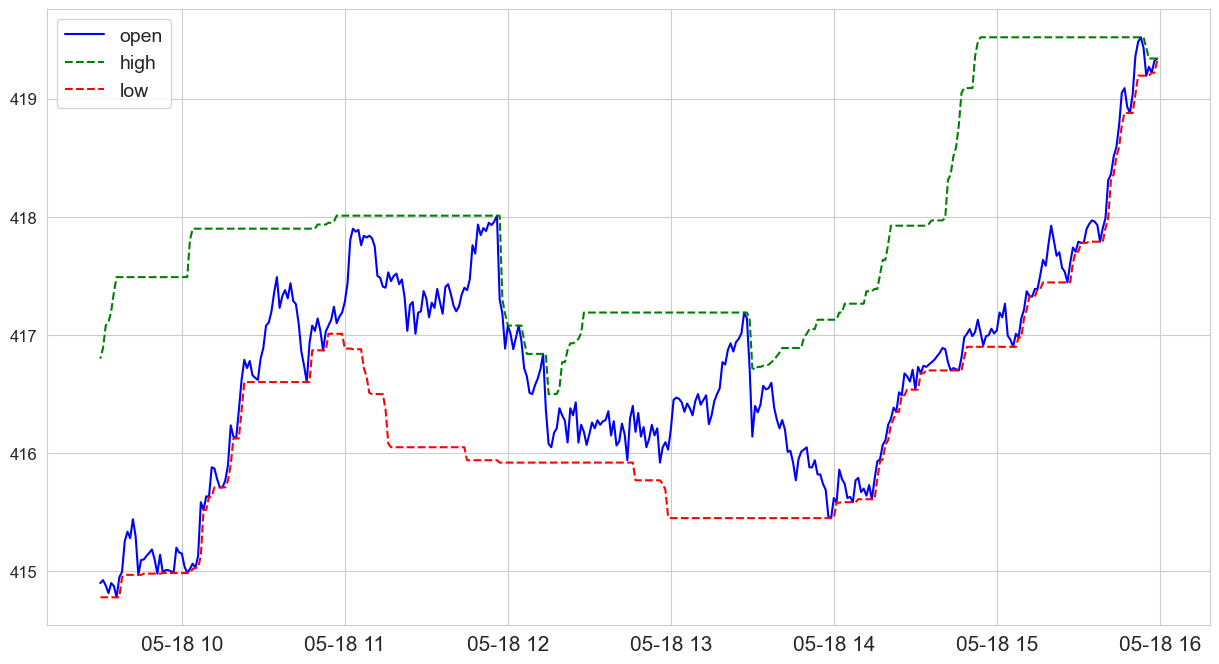

In [14]:
#Draw 'open', 'high', and 'low' for 5/18
plt.figure(figsize=(15,8))
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].time,
         dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].open,'b',label='open')
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].time,
         dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].high,'g--',label='high')
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].time,
         dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].low,'r--',label='low')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

plt.show()

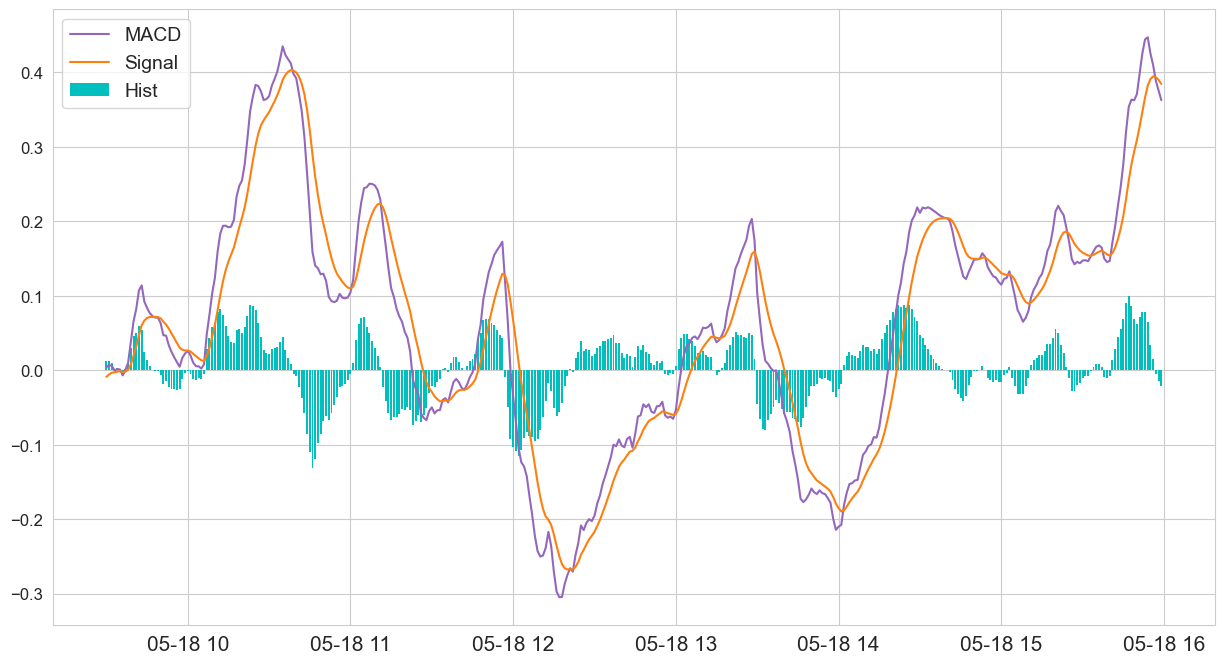

In [15]:
#Draw 'MACD', 'MACD_Signal', and 'MACD_Hist' for 5/18
plt.figure(figsize=(15,8))
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].time,
         dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].MACD,'C4',label='MACD')
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].time,
         dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].MACD_Signal,'C1',label='Signal')
plt.bar(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].time,
         dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].MACD_Hist,color='c',edgecolor='none',
                                                                                                             width=0.0005,label='Hist')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

plt.show()

<Figure size 1500x800 with 0 Axes>

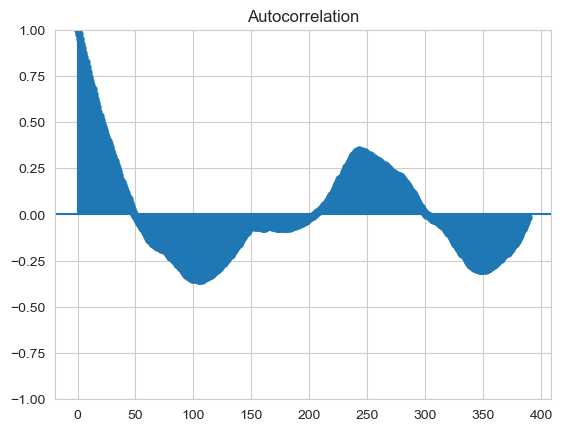

In [16]:
#Autocorrelation of 'open' on 5/18
import statsmodels.api as sm
plt.figure(figsize=(15,8))
sm.graphics.tsa.plot_acf(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].open.values,alpha=None,lags=389)
plt.show()

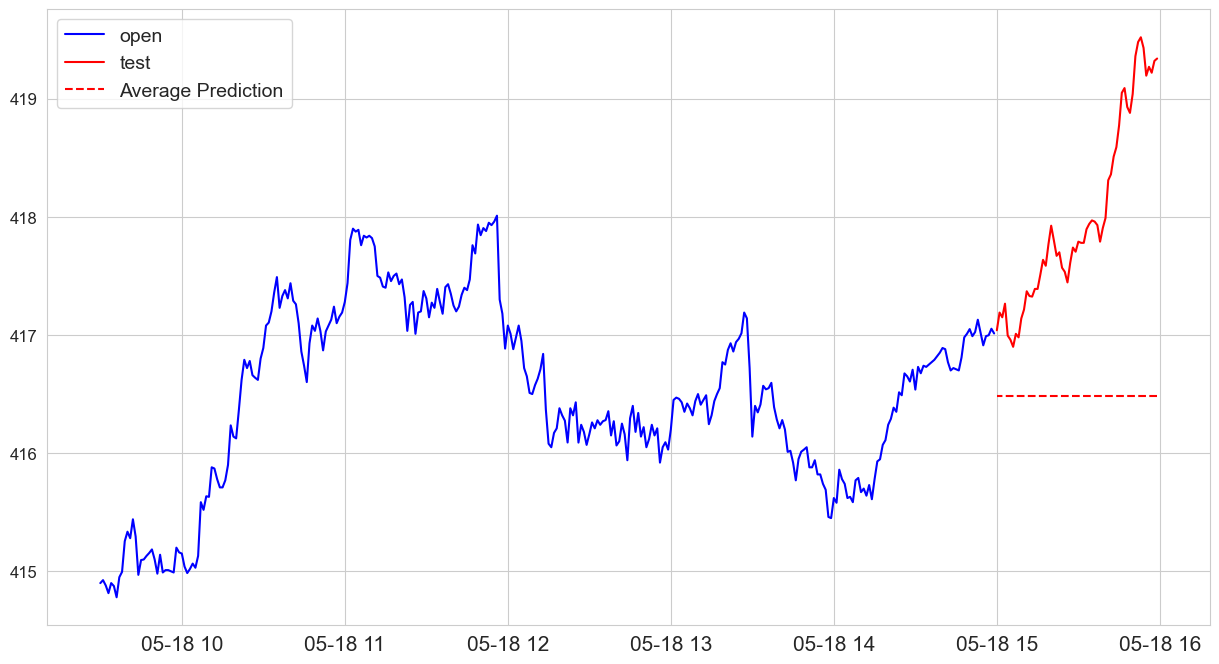

In [17]:
#One of the possible metric is the mean absolute error. To be more precise, the inputs of a general model are 'open/volume/MACD/...'
#within a 2-hour window, and the output is the high/low in an hour after that window. So in a day we have 210 2-hour windows
#from 9:30 am to 3 pm. 
#Use average prediction as the baseline model. Try this for the last hour on 5/18.
ave_pred=pd.Series(np.ones(60)*dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) &
                                                          (dfhl.time<pd.Timestamp(2023,5,18,15))].open.mean())
plt.figure(figsize=(15,8))
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,18,15))].time,
         dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,18,15))].open,'b',label='open')
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18,15)) & (dfhl.time<pd.Timestamp(2023,5,19))].time,
         dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18,15)) & (dfhl.time<pd.Timestamp(2023,5,19))].open,'r',label='test')
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18,15)) & (dfhl.time<pd.Timestamp(2023,5,19))].time,
         ave_pred,'r--',label='Average Prediction')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

plt.show()

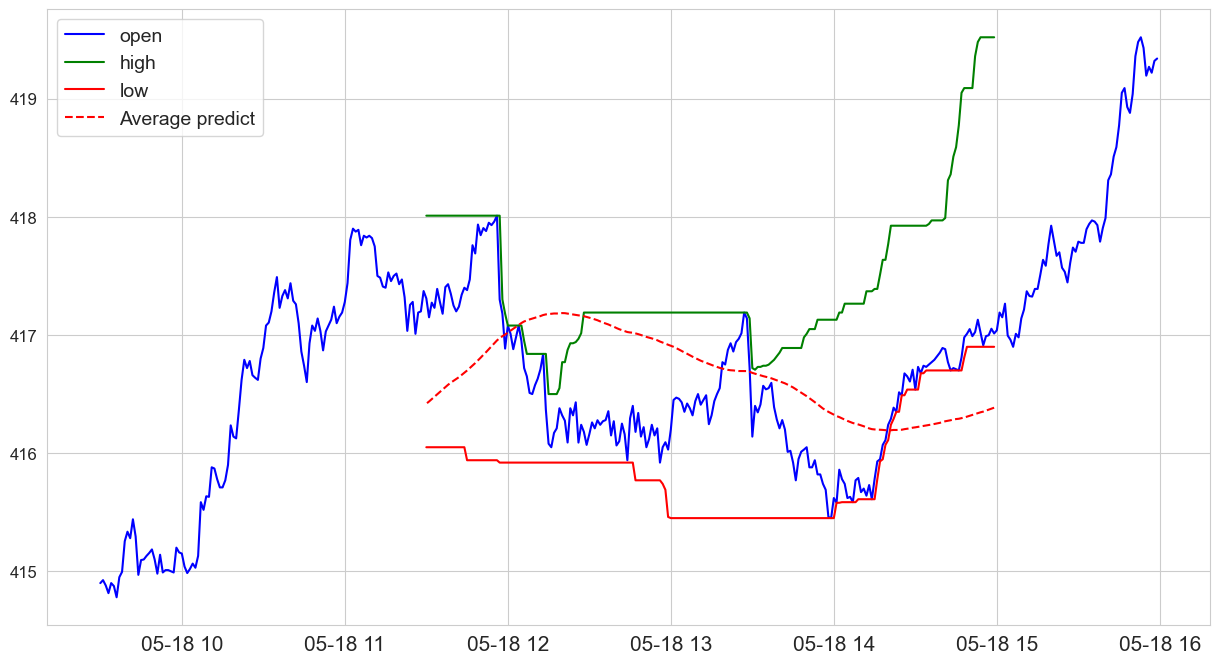

In [18]:
#Draw average predictions for high/low using the above ideas
ave_pred_series=pd.Series([],dtype='float')
train=dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,18,15))].copy().open.values
for i in range(210):
    ave_pred_series[i]=train[i:i+120].mean()
plt.figure(figsize=(15,8))
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].time,
         dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18)) & (dfhl.time<pd.Timestamp(2023,5,19))].open,'b',label='open')
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18,11,30)) & (dfhl.time<pd.Timestamp(2023,5,18,15))].time,
         dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18,11,30)) & (dfhl.time<pd.Timestamp(2023,5,18,15))].high,'g',label='high')
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18,11,30)) & (dfhl.time<pd.Timestamp(2023,5,18,15))].time,
         dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18,11,30)) & (dfhl.time<pd.Timestamp(2023,5,18,15))].low,'r',label='low')
plt.plot(dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18,11,30)) & (dfhl.time<pd.Timestamp(2023,5,18,15))].time,
         ave_pred_series,'r--',label='Average predict')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

plt.show()

In [19]:
#Calculate MAE of the baseline (Average) model
from sklearn.metrics import mean_absolute_error
mae_high = mean_absolute_error(ave_pred_series, dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18,11,30)) &
                                                      (dfhl.time<pd.Timestamp(2023,5,18,15))].high)
mae_low = mean_absolute_error(ave_pred_series, dfhl.loc[(dfhl.time>=pd.Timestamp(2023,5,18,11,30)) &
                                                      (dfhl.time<pd.Timestamp(2023,5,18,15))].low)
print('MAE_HIGH:',mae_high)
print('MAE_LOW:',mae_low)

MAE_HIGH: 0.8755099920634972
MAE_LOW: 0.9240777698412639
